<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=300 height=300 align=left class="saturate" >

<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Artificial Intelligence <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Spring 2023<br>
<font color=3C99D size=5>
    Practical Assignment 3 - Reinforcement Learning <br>
<font color=696880 size=4>
    Mohammad Moshtaghi - Ali Salesi - Hossein Goli

____

# Personal Data

In [64]:
# Set your student number
student_number = '400105003'
first_name ='Niki'
last_name = 'Sepasian'

In [1]:
#pip install gym[toy_text]
import gym 
import numpy as np
from IPython.display import clear_output
import matplotlib.pyplot as plt
import os
from tqdm import trange
os.environ["SDL_VIDEODRIVER"] = "dummy"
clear_output() # You can use this method to clear your cell's output. 

# Q1: Q-Learning (100 Points)

<font size=4>
Author: Mohammad Moshtaghi
<br/>
<font color=red>
Please run all the cells.
</font>
</font>
<br/>
</div>

# 1. Cliff Walking (70 pts)

In this section we are going to implement different Temporal Difference algorithms and compare their results. We start with a simple problem called **Cliff Walking**. You may have seen this game in your lecture slides and here we are going to train an RL Agent to play this game optimally.

First, lets get familiar with game's environment.

## 1-1. Environment (10 pts)

Lets declare our environment and see some of its hyperparameters.

In [66]:
env = gym.make('CliffWalking-v0',render_mode = 'rgb_array')
spec = gym.spec('CliffWalking-v0')

print(f"Action Space: {env.action_space}")
print(f"Observation Space: {env.observation_space}")
print(f"Max Episode Steps: {spec.max_episode_steps}")
print(f"Nondeterministic: {spec.nondeterministic}")
print(f"Reward Range: {env.reward_range}")
print(f"Reward Threshold: {spec.reward_threshold}\n")

Action Space: Discrete(4)
Observation Space: Discrete(48)
Max Episode Steps: None
Nondeterministic: False
Reward Range: (-inf, inf)
Reward Threshold: None



In [67]:
Actions =  {0: 'UP', 
            1: 'RIGHT',
            2: 'DOWN',
            3: 'LEFT'}

You can use **_visualize_** function to draw your state.

In [68]:
def visualize(env, action=None, reward=None):
    env_screen = env.render()
    plt.imshow(env_screen)
    plt.axis('off');
    title = ''
    if action:
        title += f'Action: {Actions[action]}'
    if reward:
        title += f'Reward: {reward}'
    
    plt.title(title)
    plt.show()

Test `visualize` function with a random action. First, using `env.reset` function, we reset our environment so that our agent returns to the starting point. for moving your agent, use `env.step` function. it returns four values:

1. next_state
2. reward
3. done
4. some info (Honestly, it doesn't matter)

You may need this functions later :)



(24, -1, False, False, {'prob': 1.0})
(25, -1, False, False, {'prob': 1.0})
(26, -1, False, False, {'prob': 1.0})
(27, -1, False, False, {'prob': 1.0})
(28, -1, False, False, {'prob': 1.0})
(29, -1, False, False, {'prob': 1.0})
(30, -1, False, False, {'prob': 1.0})
(31, -1, False, False, {'prob': 1.0})
(32, -1, False, False, {'prob': 1.0})
(33, -1, False, False, {'prob': 1.0})
(34, -1, False, False, {'prob': 1.0})
(35, -1, False, False, {'prob': 1.0})
(47, -1, True, False, {'prob': 1.0})


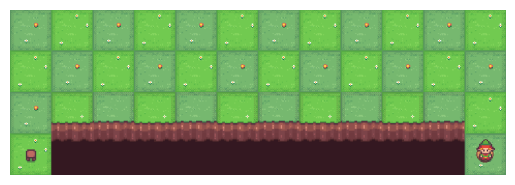

In [69]:
env.reset() # You can use this function to reset your environment.
######################## YOUR CODE HERE ########################
print(env.step(0))
for i in range(11):
    print(env.step(1))
print(env.step(2))
visualize(env)

######################## END YOUR CODE #########################

## 1-2. Agent

Please read the class below. You must inherite this class in the following sections and implement different RL algorithms.

In [5]:
class Agent:

    def __init__(self, env, noise):
        self.q_values = []
        self.env = env
        self.noise = noise
        self.policy = [0] * env.observation_space.n 
        self.q_values= np.zeros((self.env.observation_space.n,self.env.action_space.n))


    def learn(self, num_episodes, alpha, gamma, epsilon):
        """
        Implement your Reinforcement Learning algorithm and train your agent in this function. 
        At the end, you must fill the q_values array.

        Inputs:
            - alpha: Learning rate
            - gamma: Discount factor
            - epsilon: The probability that the agent will act randomly instead of greedy in sampling.
        """

        raise NotImplementedError()
    
    def create_policy(self):
        """
        Create your policy in this function after your agent learns the q_values.
        """
        for state in range(self.env.observation_space.n):
            self.policy[state]=np.argmax(self.q_values[state,:])
       
    def act(self):
        """
        Move your agent one step according to your policy.
        """
        ######################## YOUR CODE HERE ########################
        if np.random.uniform(0, 1) <self.noise:
            return env.step(env.action_space.sample())
        else: 
            return env.step(self.policy[env.s])
        ######################## END YOUR CODE #########################
        pass

    def evaluate(self, num_episodes):
        """
        Sample num_episodes episodes from your agent that acts according to your policy.
        Then return the average rewards it gets.

        Inputs:
            - num_episodes: Number of episodes for sampling.
        """
        ######################## YOUR CODE HERE ########################
        total_reward=0
        for i in range(num_episodes):
            current_state=self.env.reset()[0]
            reward=0
            while True:
                step_returned_values= self.act()
                total_reward+=step_returned_values[1]
                if step_returned_values[2]:
                    break
                current_state=step_returned_values[0]
        
        return (total_reward/num_episodes)
    
        ######################## END YOUR CODE #########################

## 1-3. Q-Learning (15 pts)

In this section, you must use **_Q-Learning_** algorithm to train your agent. Note that the action-value function Q(s,a) is updated iteratively as follows:

$$ Q(s,a) \leftarrow Q(s,a) + \alpha \left( r + \gamma \max_{a'} Q(s',a') - Q(s,a) \right) $$

where ‍‍‍‍‍`r` is the reward received after taking action a in state `s`, `s'` is the new state, $\gamma$ is the discount factor (a value between 0 and 1 that determines the importance of future rewards), and $\alpha$ is the learning rate (determines the step size at which the value function is updated).

In [71]:
class CliffWalkerQL(Agent):
    def choose_action(self, epsilon, state):
        if np.random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(self.q_values[state, :])
        return action
    
    def learn(self, num_episodes, alpha, gamma, epsilon):
        ######################## YOUR CODE HERE ########################
        for i in range(num_episodes):
            current_state = env.reset()[0]
            while True:
                current_action = self.choose_action(epsilon, current_state)
                step_returned_values=env.step(current_action)
                
                next_state=step_returned_values[0]
                next_action = np.argmax(self.q_values[next_state, :])
                
                current_Q=self.q_values[current_state,current_action]
                new_Q=self.q_values[next_state,next_action]
                
                self.q_values[current_state,current_action]=current_Q + alpha*(step_returned_values[1] + gamma*new_Q - current_Q)

                if step_returned_values[2]:
                    break
                    
                current_state=next_state
        self.create_policy()
        ######################## END YOUR CODE #########################


## 1-4. Q-Learning Evaluation (10 pts)

Train your agent and then evaluate it and display the result. Using the `visualize` function, show the path your agent takes in one of the episodes.

In [72]:
cliff_walker_ql = CliffWalkerQL(env, 0)
alpha = 0.8
gamma = 0.95
epsilon = 0.2
episodes = 1000
cliff_walker_ql.learn(episodes, alpha, gamma, epsilon)

In [73]:
######################## YOUR CODE HERE ########################
cliff_walker_ql.create_policy()
print(cliff_walker_ql.evaluate(1000))
# current_state=env.reset()[0]
# while True:
#     step_returned_values, action=cliff_walker_ql.act(current_state)
#     print("actions taken:", Actions[action])
#     current_state=step_returned_values[0]
#     visualize(env)
#     if step_returned_values[2]:
#         break
######################## END YOUR CODE #########################

-13.0


## 1-5. SARSA (15 pts)

This time, you should use the SARSA algorithm, which is slightly different from the Q-Learning in implementation. But the result may significantly differ, and you should explain this difference, if any. 

Note that the SARSA update rule can be represented as:

$$Q(S_t,A_t) \leftarrow Q(S_t,A_t) + \alpha \left( R_{t+1} + \gamma Q(S_{t+1},A_{t+1}) - Q(S_t,A_t) \right)$$


Where $Q(S_t,A_t)$ is the current estimate of the expected return for taking action $A_t$ in state $S_t$, $\alpha$ is the learning rate, $R_{t+1}$ is the reward received after taking action $A_t$ in state $S_t$, $\gamma$ is the discount factor, and $Q(S_{t+1},A_{t+1})$ is the estimated return for taking action $A_{t+1}$ in the next state $S_{t+1}$.

In [74]:
class CliffWalkerSARSA(Agent):
    
    def choose_action(self,state):
            
        if np.random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(self.q_values[state, :])
        return action
    
    
    def learn(self, num_episodes, alpha, gamma, epsilon):
        ######################## YOUR CODE HERE ########################
        for i in range(num_episodes):
            current_state = env.reset()[0]
            current_action = self.choose_action(current_state)

            while True:

                step_returned_value=env.step(current_action)
                next_state=step_returned_value[0]
                next_action = self.choose_action(next_state)
                
                current_Q=self.q_values[current_state, current_action]
                new_Q =self.q_values[next_state, next_action]
                
                self.q_values[current_state,current_action]= current_Q + alpha*(step_returned_value[1] + gamma*new_Q - current_Q)
               
                
                if step_returned_value[2]:
                    break
                current_state=next_state
                current_action=next_action
              
        self.create_policy()       
        ######################## END YOUR CODE #########################

## 1-6. SARSA Evaluation (10 pts)

Train your agent and then evaluate it and display the result. Using the `visualize` function, show the path your agent takes in one of the episodes.

In [76]:
cliff_walker_sarsa = CliffWalkerSARSA(env, 0)
alpha = 0.1
gamma = 0.9
epsilon = 0.5
episodes = 1000
cliff_walker_sarsa.learn(episodes, alpha, gamma, epsilon)
print(cliff_walker_ql.evaluate(1000))

-13.0


In [55]:
######################## YOUR CODE HERE ########################
# current_state = env.reset()[0]
# start_action = cliff_walker_sarsa.choose_action(current_state)

# while True:
#     next_state=env.step(start_action)[0]
  
#     temp_action = cliff_walker_sarsa.choose_action(next_state)
#     new_Q=cliff_walker_sarsa.q_values[next_state, temp_action]
#     current_Q=cliff_walker_sarsa.q_values[current_state, start_action]

#     cliff_walker_sarsa.q_values[current_state, start_action] = current_Q + alpha * (env.step(start_action)[1] + gamma * new_Q - current_Q)
#     start_action=temp_action
#     current_state=next_state
    
# #commented so the file wouldn't become to heavy    
# #visualize(env)
#     if env.step(start_action)[2]:
#         break
               

## 1-7. Increase Noises (10 pts)

Increase noise and see how your obtained policy changes. Do this for both above algorithms and repeat above steps.

In [77]:
######################## YOUR CODE HERE ########################
cliff_walker_ql = CliffWalkerQL(env, 0.5)
alpha = 0.8
gamma = 0.95
epsilon = 0.2
episodes = 1000

cliff_walker_ql.learn(episodes, alpha, gamma, epsilon)
######################## END YOUR CODE #########################
######################## YOUR CODE HERE ########################
# cliff_walker_ql.create_policy()
print(cliff_walker_ql.evaluate(1000))
# current_state=env.reset()[0]
# while True:
#     step_returned_values=cliff_walker_ql.act()
#     print("actions taken:", Actions[action])
#     current_state=step_returned_values[0]
# #     visualize(env)
#     if step_returned_values[2]:
#         break
# ######################## END YOUR CODE #########################

-289.497


In [78]:
cliff_walker_sarsa = CliffWalkerSARSA(env, 0.5)
print(cliff_walker_ql.evaluate(1000))
# alpha = 0.1
# gamma = 0.9
# epsilon = 0.5
# episodes = 1000
# cliff_walker_sarsa.learn(episodes, alpha, gamma, epsilon)
# ######################## YOUR CODE HERE ########################
# current_state = env.reset()[0]
# start_action = cliff_walker_sarsa.choose_action(current_state)

# while True:
#     next_state=env.step(start_action)[0]

   
#     temp_action = cliff_walker_sarsa.choose_action(next_state)
#     new_Q=cliff_walker_sarsa.q_values[next_state, temp_action]
#     current_Q=cliff_walker_sarsa.q_values[current_state, start_action]

#     cliff_walker_sarsa.q_values[current_state, start_action] = current_Q + alpha * (env.step(start_action)[1] + gamma * new_Q - current_Q)
#     start_action=temp_action
#     current_state=next_state
    
# #     visualize(env)
#     if env.step(start_action)[2]:
#         break

-294.023


The next game that we want to implement is **Taxi Driver**. 

# 2. Taxi Driver (30 pts)

## 2-1. Environment

In [2]:
env = gym.make('Taxi-v3')
spec = gym.spec('Taxi-v3')

print(f"Action Space: {env.action_space}")
print(f"Observation Space: {env.observation_space}")
print(f"Max Episode Steps: {spec.max_episode_steps}")
print(f"Nondeterministic: {spec.nondeterministic}")
print(f"Reward Range: {env.reward_range}")
print(f"Reward Threshold: {spec.reward_threshold}\n")

Action Space: Discrete(6)
Observation Space: Discrete(500)
Max Episode Steps: 200
Nondeterministic: False
Reward Range: (-inf, inf)
Reward Threshold: 8



In [3]:
Actions =  {0: 'DOWN', 
            1: 'UP',
            2: 'RIGHT',
            3: 'LEFT',
            4: 'Pickup passenger',
            5: 'Drop off passenger'}

You can read more about the game and its observation space in this [link](https://gymnasium.farama.org/environments/toy_text/taxi/#observation-space).



## 2-2. Q-Learning (5 pts)

Implement Q-Learning algorithm for this problem. (Of course, you can use the code you implemented in the previous section and just enjoy the result (: )

In [81]:
class TaxiQL(Agent):
    def choose_action(self, epsilon, state):
        if np.random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(self.q_values[state, :])
        return action
    
    def learn(self, num_episodes, alpha, gamma, epsilon):
        ######################## YOUR CODE HERE ########################
        for i in range(num_episodes):
            current_state = env.reset()[0]
            while True:
                current_action = self.choose_action(epsilon, current_state)
                step_returned_values=env.step(current_action)
                
                next_state=step_returned_values[0]
                next_action = np.argmax(self.q_values[next_state, :])
                
                current_Q=self.q_values[current_state,current_action]
                new_Q=self.q_values[next_state,next_action]
                
                self.q_values[current_state,current_action]=current_Q + alpha*(step_returned_values[1] + gamma*new_Q - current_Q)

                if step_returned_values[2]:
                    break
                    
                current_state=next_state
        self.create_policy()
        ######################## END YOUR CODE #########################


## 2-3. Q-Learning Evaluation (5 pts) 

Train your agent two times, once with 1000 episodes and once with 10000 episodes. Then evaluate it and display the result. Using the `visualize` function, show the path your agent takes in one of the episodes.

In [82]:
taxi_ql = TaxiQL(env, 0)
alpha = 0.7
gamma = 0.9
epsilon = 0.9
episodes = 1000
taxi_ql.learn(episodes, alpha, gamma, epsilon)

In [83]:
######################## YOUR CODE HERE ########################
print(taxi_ql.evaluate(episodes))
######################## END YOUR CODE #########################

7.944


In [84]:
taxi_ql = TaxiQL(env, 0)
alpha = 0.7
gamma = 0.9
epsilon = 0.9
episodes = 10000
taxi_ql.learn(episodes, alpha, gamma, epsilon)

In [86]:
######################## YOUR CODE HERE ########################
print(taxi_ql.evaluate(episodes))
######################## END YOUR CODE #########################

7.9188


## 2-4. TD(2) (15 pts)

In this section, you have to implement the Taxi problem using TD(2) algorithm. The difference between this method and the previous methods is in the number of movements that we look from the future.

For example, the SARSA TD(2) update rule can be represented as:

$$Q(S_t,A_t) \leftarrow Q(S_t,A_t) + \alpha \left( R_{t+1} + \gamma Q(S_{t+1},A_{t+1}) + \gamma^2 Q(s_{t+2},A_{t+2}) - Q(S_t,A_t) \right)$$


Where $Q(S_t,A_t)$ is the current estimate of the expected return for taking action $A_t$ in state $S_t$, $\alpha$ is the learning rate, $R_{t+1}$ is the reward received after taking action $A_t$ in state $S_t$, $\gamma$ is the discount factor, and $Q(S_{t+1},A_{t+1})$ is the estimated return for taking action $A_{t+1}$ in the next state $S_{t+1}$.

You can see [this video](https://youtu.be/AJiG3ykOxmY) for more details about TD methods.

In [9]:
class TaxiTD2(Agent):
    def choose_action(self, epsilon, state):
        if np.random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(self.q_values[state, :])
        return action
    
    def learn(self, num_episodes, alpha, gamma, epsilon):
        ######################## YOUR CODE HERE ########################
        for i in range(num_episodes):
            state1 = env.reset()[0]
            action1 = self.choose_action(epsilon, state1)
            step_returned_values_1=env.step(action1)
            state2=step_returned_values_1[0]
            action2 = self.choose_action(epsilon, state2)
            while True:    
                step_returned_values_2=env.step(action2)
                state3=step_returned_values_2[0]
                action3 = self.choose_action(epsilon, state3)
                
                current_Q=self.q_values[state1,action1]
                new_Q=self.q_values[state3,action3]
                
                self.q_values[state1,action1]=current_Q + alpha*(step_returned_values_1[1]+gamma*step_returned_values_2[1] + gamma*gamma*new_Q - current_Q)

                if step_returned_values_2[2]:
                    break
                    
                state1=state2
                action1=action2
                state2=state3
                action2=action3
                
        self.create_policy()
        ######################## END YOUR CODE #########################


## 2-5. TD(2) Evaluation (5 pts)

In [10]:
taxi_td2 = TaxiTD2(env, 0)
alpha = 0.7
gamma = 0.9
epsilon = 0.9
episodes = 1000
taxi_td2.learn(episodes, alpha, gamma, epsilon)

In [ ]:
######################## YOUR CODE HERE ########################
print(taxi_td2.evaluate(episodes))
######################## END YOUR CODE #########################

You can see that the TD(2) method can reach an acceptable policy faster. Try to explain why.